# Problem Set 2

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# Add the directory where fixed_income_derivatives.py is located to the system path
sys.path.append(os.path.abspath("../Files"))

# Now you can import your module
import fixed_income_derivatives as fid

### Problem 1

In [2]:
# b)

# cash flow matrix
cf_m = np.array([[-101.3, 2.55, 0, 102.55, 0, 0, 0, 0], # swap 1
                      [0, 102.45, 0, -4.4, 0, 0, 0, -104.4], # swap 2
                      [-101.3, 0, 0, 4.9, 0, 0, 0, 104.9], # swap 3
                      [1.75, 1.75, 1.75, 101.75, 0, 0, 0, 0], # bond 4
                      [0, 2.5, 0, 2.5, 0, 102.5, 0, 0], # bond 5
                      [0, 0, 0, 6, 0, 0, 0, 106], # bond 6
                      [1.125, 1.125, 1.125, 1.125, 1.125, 101.125, 0, 0], # bond 7
                      [1.375, 1.375, 1.375, 1.375, 1.375, 1.375, 1.375, 101.375] # bond 8
                      ])

# time matrix
t_m = np.array([0, 5/24, 11/24, 17/24, 23/24, 29/24, 35/24, 41/24, 47/24])

# print rank of the cash flow matrix
print("Rank of the cash flow matrix: ", np.linalg.matrix_rank(cf_m))

Rank of the cash flow matrix:  8


In [3]:
# c)

# price matrix
p_m = np.array([
    0.79492002,   # Price of Swap 1
    -1.02540877,  # Price of Swap 2
    2.05066409,   # Price of Swap 3
    103.02163487, # Price of Bond 4
    101.80152680, # Price of Bond 5
    104.48120266, # Price of Bond 6
    101.10990798, # Price of Bond 7
    103.67216735  # Price of Bond 8
])

# finding the zero coupon bond prices
zcb = np.ones(9)
zcb[1:] = np.linalg.solve(cf_m, p_m)
print("Zero coupon bond prices: ", zcb)

Zero coupon bond prices:  [1.         0.99060312 0.9802517  0.97073639 0.96190516 0.95363276
 0.94581595 0.93836974 0.93122426]


In [4]:
# deriving spot rates from zcb prices
spot_rates = np.zeros(9)
for i in range (1,9):
    spot_rates[i] = -np.log(zcb[i])/(t_m[i]-t_m[0])

print("Spot rates: ", spot_rates)

Spot rates:  [0.         0.04531828 0.04351833 0.04192989 0.04052809 0.03929101
 0.03819928 0.03723584 0.03638561]


In [5]:
# deriving forward rates from zcb
forward_3m = np.zeros(9)
forward_3m[0] = spot_rates[0]
for i in range(1,9):
    forward_3m[i] = -(np.log(zcb[i])-np.log(zcb[i-1]))/(t_m[i]-t_m[i-1])

print("Forward rates: ", forward_3m)

Forward rates:  [0.         0.04531828 0.04201838 0.03901773 0.03655633 0.03454886
 0.03292262 0.03161576 0.03057569]


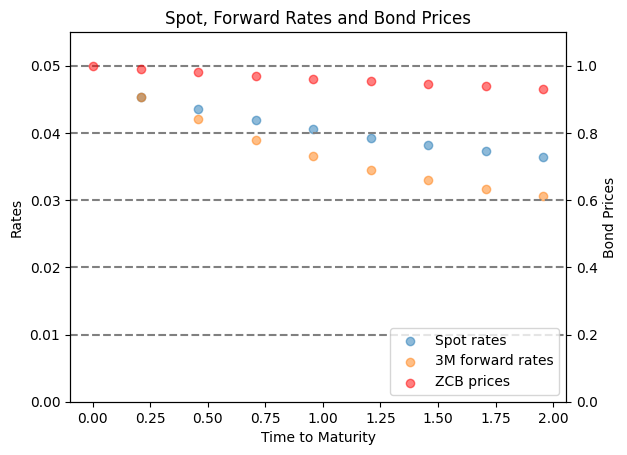

In [6]:
fig, ax1 = plt.subplots()

scatter1 = ax1.scatter(t_m[1:], spot_rates[1:], label='Spot rates', alpha=0.5)
scatter2 = ax1.scatter(t_m[1:], forward_3m[1:], label='3M forward rates', alpha=0.5)
ax1.set_ylim([0, 0.055])
ax1.set_xlabel('Time to Maturity')
ax1.set_ylabel('Rates')

# add dotted lines across the plot at 0.01, 0.02, 0.03, 0.04 and 0.05
for i in range(1, 6):
    ax1.axhline(y=i*0.01, color='gray', linestyle='--')

# Add bond prices to the plot on the right axis
ax2 = ax1.twinx()
scatter3 = ax2.scatter(t_m, zcb, label='ZCB prices', color='red', alpha=0.5)
ax2.set_ylim([0, 1.1])
ax2.set_ylabel('Bond Prices')

# Combine legends
scatters = [scatter1, scatter2, scatter3]
labels = [scatter.get_label() for scatter in scatters]
ax1.legend(scatters, labels, loc='lower right')

plt.title('Spot, Forward Rates and Bond Prices')
plt.show()

In [41]:
# e)

# new spot rates
spot_new = spot_rates - 0.0001

print("New spot rates: ", spot_new)

# new zero coupon bond prices
zcb_new = zcb.copy()
for i in range(1,9):
    zcb_new[i] = np.exp(-spot_new[i]*(t_m[i]-t_m[0]))

print("New zero coupon bond prices: ", zcb_new)

# new prices
p_m_new = np.dot(cf_m, zcb_new[1:])
print("New prices: ", p_m_new)

New spot rates:  [-0.0001      0.04521828  0.04341833  0.04182989  0.04042809  0.03919101
  0.03809928  0.03713584  0.03628561]
New zero coupon bond prices:  [1.         0.99062376 0.98029663 0.97080515 0.96199735 0.95374799
 0.94595389 0.93853006 0.93140664]
New prices:  [  0.80239776  -1.04025214   2.06815713 103.03124997 101.8160086
 104.50108834 101.12424179 103.69153641]


In [43]:
# prices does not seem to align with the guide... working backwards from there
# New prices of the swaps and bonds (provided)
p_given = np.array([
    0.79112002,  # New price of Swap 1
    -1.01905877, # New price of Swap 2
    2.04216409,  # New price of Swap 3
    102.91463487, # New price of Bond 4
    101.6940268,  # New price of Bond 5
    104.36920266, # New price of Bond 6
    101.00315798, # New price of Bond 7
    103.56116735  # New price of Bond 8
])


# Solve for new ZCB prices
zcb_computed = np.ones(9)
zcb_computed[1:] = np.linalg.solve(cf_m, p_given)

# Compute new spot rates from the new ZCB prices
spot_rates_computed = np.zeros(9)
spot_rates_computed[1:] = -np.log(zcb_computed[1:]) / t_m[1:]

# Compute the change in spot rates
change_in_spot_rates = spot_rates_computed - spot_rates

# Display the change in spot rates
change_in_spot_rates

# we find a non-constant change in spot rates...

array([0.        , 0.00484798, 0.00222691, 0.00145507, 0.00108537,
       0.00086828, 0.00072538, 0.00062414, 0.00054865])